In [1]:
import pandas as pd
import numpy as np
import plotly.io as pio

pio.renderers.default = 'iframe'

In [2]:
df = pd.read_csv('NetFilx_Data.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


1. Distribution of Content Released:
- Most of the series have only one season, probably because they were canceled or they are new and the second season is in production.
2. Movie Duration Analysis
3. Top Genres Released by Year

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15574 entries, 0 to 15573
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       15574 non-null  object
 1   type          15574 non-null  object
 2   title         15574 non-null  object
 3   director      10796 non-null  object
 4   cast          14138 non-null  object
 5   country       14560 non-null  object
 6   date_added    15554 non-null  object
 7   release_year  15574 non-null  int64 
 8   rating        15560 non-null  object
 9   duration      15574 non-null  object
 10  listed_in     15574 non-null  object
 11  description   15574 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.4+ MB


In [4]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [5]:
df.isnull().sum() 

show_id            0
type               0
title              0
director        4778
cast            1436
country         1014
date_added        20
release_year       0
rating            14
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."
7854,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
10146,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
11447,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."


In [7]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [8]:
df = df.drop(['director', 'cast'], axis=1)

In [9]:
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
country         1014
date_added        20
release_year       0
rating            14
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
df[df['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [12]:
df[['date_added', 'release_year']]

,date_added,release_year
0,"August 14, 2020",2020
1,"December 23, 2016",2016
2,"December 20, 2018",2011
3,"November 16, 2017",2009
4,"January 1, 2020",2008
...,...,...
15569,"October 19, 2020",2005
15570,"March 2, 2019",2015
15571,"September 25, 2020",2019
15572,"October 31, 2020",2019


In [13]:
df = df[df['date_added'].notna()]
df = df.reset_index(drop=True)

In [14]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...
15549,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
15550,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
15551,s7785,Movie,Zulu Man in Japan,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
15552,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [15]:
# df.groupby(['type'])['country'].aggregate(['unique', 'nunique'])
# df.groupby(['country'])['title'].aggregate(['unique', 'nunique'])
df.groupby(['country'])['title'].count().sort_values(ascending=False)

country
United States                        5098
India                                1846
United Kingdom                        792
Japan                                 450
South Korea                           366
                                     ... 
Indonesia, South Korea, Singapore       2
Indonesia, United Kingdom               2
Indonesia, United States                2
Iran, France                            2
Zimbabwe                                2
Name: title, Length: 681, dtype: int64

In [16]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [17]:
df.isnull().sum()

show_id          0
type             0
title            0
country          0
date_added       0
release_year     0
rating          14
duration         0
listed_in        0
description      0
dtype: int64

In [18]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_added']

0        2020
1        2016
2        2018
3        2017
4        2020
         ... 
15549    2020
15550    2019
15551    2020
15552    2020
15553    2020
Name: year_added, Length: 15554, dtype: object

In [19]:
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_added']

0           August
1         December
2         December
3         November
4          January
           ...    
15549      October
15550        March
15551    September
15552      October
15553        March
Name: month_added, Length: 15554, dtype: object

In [20]:
df[df.duplicated()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
7777,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
7778,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
7779,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December
7780,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November
7781,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January
...,...,...,...,...,...,...,...,...,...,...,...,...
15549,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October
15550,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March
15551,s7785,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September
15552,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,October


In [21]:
df = df.drop_duplicates()

In [22]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January
...,...,...,...,...,...,...,...,...,...,...,...,...
7772,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October
7773,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March
7774,s7785,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September
7775,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,October


In [23]:
df = df.reset_index(drop=True)
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January
...,...,...,...,...,...,...,...,...,...,...,...,...
7772,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October
7773,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March
7774,s7785,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September
7775,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,October


In [24]:
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [25]:
rating_ages = {
    'TV-MA': 'Adults', 
    'R': 'Adults',  
    'PG-13': 'Teens', 
    'TV-14': 'Teens', 
    'TV-PG': 'Older Kids', 
    'NR': 'Adults',  
    'TV-G': 'Kids', 
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids', 
    'PG': 'Older Kids',  
    'G': 'Kids', 
    'NC-17': 'Adults',  
    'TV-Y7-FV': 'Older Kids', 
    'UR': 'Adults'
}

df['target_ages'] = df.rating.replace(rating_ages)

In [26]:
df['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

In [27]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October,Adults
7773,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March,Teens
7774,s7785,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September,Adults
7775,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,October,Older Kids


In [28]:
df['principal_country'] = df['country'].apply(lambda x: x.split(", ")[0])
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults,Brazil
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,Mexico
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults,Singapore
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens,United States
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October,Adults,Sweden
7773,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March,Teens,India
7774,s7785,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September,Adults,United States
7775,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,October,Older Kids,Australia


In [29]:
df['type'] = pd.Categorical(df['type'])
df['target_ages'] = pd.Categorical(df['target_ages'])
df['year_added'] = pd.to_numeric(df['year_added'])

In [30]:
df.dtypes

show_id                object
type                 category
title                  object
country                object
date_added             object
release_year            int64
rating                 object
duration               object
listed_in              object
description            object
year_added              int64
month_added            object
target_ages          category
principal_country      object
dtype: object

In [31]:
df['listed_in']

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1                            Dramas, International Movies
2                     Horror Movies, International Movies
3       Action & Adventure, Independent Movies, Sci-Fi...
4                                                  Dramas
                              ...                        
7772                         Dramas, International Movies
7773       Dramas, International Movies, Music & Musicals
7774    Documentaries, International Movies, Music & M...
7775                   International TV Shows, Reality TV
7776                      Documentaries, Music & Musicals
Name: listed_in, Length: 7777, dtype: object

In [32]:
df['genre'] = df['listed_in'].apply(
    lambda x : x.replace(" ,", ",").replace(", ", ",").split(",")
)

In [33]:
df['genre']

0       [International TV Shows, TV Dramas, TV Sci-Fi ...
1                          [Dramas, International Movies]
2                   [Horror Movies, International Movies]
3       [Action & Adventure, Independent Movies, Sci-F...
4                                                [Dramas]
                              ...                        
7772                       [Dramas, International Movies]
7773     [Dramas, International Movies, Music & Musicals]
7774    [Documentaries, International Movies, Music & ...
7775                 [International TV Shows, Reality TV]
7776                    [Documentaries, Music & Musicals]
Name: genre, Length: 7777, dtype: object

In [34]:
movie_df = df[df['type'] == 'Movie']
show_df = df[df['type'] == 'TV Show']

In [35]:
import plotly.express as px

value_count = df['type'].value_counts().reset_index()
value_count.columns = ['type', 'count']

# Create Pie Chart

fig = px.pie(value_count, values='count', names='type')
fig.update_traces(
    textposition='inside',
    textinfo='percent+label'
)
fig.show()

In [36]:
fig = px.histogram(df, x='principal_country')
fig.update_xaxes(
    categoryorder='total descending'
)
fig.show()

In [37]:
from scipy.stats import norm
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

<Axes: xlabel='release_year', ylabel='Density'>

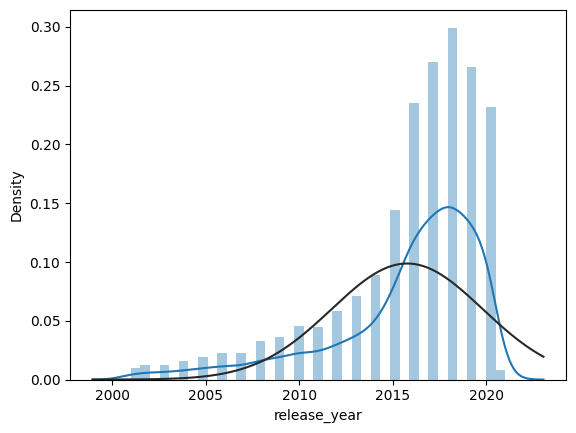

In [38]:
x = df.loc[df['release_year']> 2000]
x = x[['release_year']]

sns.distplot(   
    x['release_year'],
    fit=norm,
    kde=True  
)

In [39]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country,genre
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults,Brazil,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,Mexico,"[Dramas, International Movies]"
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults,Singapore,"[Horror Movies, International Movies]"
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens,United States,"[Action & Adventure, Independent Movies, Sci-F..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens,United States,[Dramas]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October,Adults,Sweden,"[Dramas, International Movies]"
7773,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March,Teens,India,"[Dramas, International Movies, Music & Musicals]"
7774,s7785,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September,Adults,United States,"[Documentaries, International Movies, Music & ..."
7775,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,October,Older Kids,Australia,"[International TV Shows, Reality TV]"


# Movie Duration Analysis
- less than 1.30 hours
- More than 1.30 hours and less than 2.30
- More than 2.30

In [40]:
df_movie = df.loc[df['type']=='Movie'].reset_index(drop=True)
df_movie

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country,genre
0,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,Mexico,"[Dramas, International Movies]"
1,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults,Singapore,"[Horror Movies, International Movies]"
2,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens,United States,"[Action & Adventure, Independent Movies, Sci-F..."
3,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens,United States,[Dramas]
4,s7,Movie,122,Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,June,Adults,Egypt,"[Horror Movies, International Movies]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,s7782,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,January,Older Kids,United States,"[Children & Family Movies, Comedies]"
5373,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October,Adults,Sweden,"[Dramas, International Movies]"
5374,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March,Teens,India,"[Dramas, International Movies, Music & Musicals]"
5375,s7785,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September,Adults,United States,"[Documentaries, International Movies, Music & ..."


In [41]:
time_duration = df_movie['duration'].apply(lambda x : int(x.split(' ')[0]))
time_duration

0        93
1        78
2        80
3       123
4        95
       ... 
5372     88
5373     99
5374    111
5375     44
5376     90
Name: duration, Length: 5377, dtype: int64

In [42]:
df_movie.loc[
    time_duration.loc[time_duration < 90].index, 'new_duration'
] = 'less than 1.30 hours'

df_movie.loc[
    time_duration.loc[time_duration >= 150].index, 'new_duration'
] = 'More than 2.30 hours'

df_movie.loc[
    time_duration.loc[(time_duration >= 90) & (time_duration < 150)].index, 'new_duration'
] = 'More than 1.30 hours - Less than 2.30 hours'

In [43]:
df_movie

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country,genre,new_duration
0,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,Mexico,"[Dramas, International Movies]",More than 1.30 hours - Less than 2.30 hours
1,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults,Singapore,"[Horror Movies, International Movies]",less than 1.30 hours
2,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens,United States,"[Action & Adventure, Independent Movies, Sci-F...",less than 1.30 hours
3,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens,United States,[Dramas],More than 1.30 hours - Less than 2.30 hours
4,s7,Movie,122,Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,June,Adults,Egypt,"[Horror Movies, International Movies]",More than 1.30 hours - Less than 2.30 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,s7782,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,January,Older Kids,United States,"[Children & Family Movies, Comedies]",less than 1.30 hours
5373,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October,Adults,Sweden,"[Dramas, International Movies]",More than 1.30 hours - Less than 2.30 hours
5374,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March,Teens,India,"[Dramas, International Movies, Music & Musicals]",More than 1.30 hours - Less than 2.30 hours
5375,s7785,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September,Adults,United States,"[Documentaries, International Movies, Music & ...",less than 1.30 hours


In [44]:
fig = px.histogram(
    x=df_movie['new_duration'],
    color=df_movie['new_duration']
)

fig.show()

In [45]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country,genre
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults,Brazil,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,Mexico,"[Dramas, International Movies]"
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults,Singapore,"[Horror Movies, International Movies]"
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens,United States,"[Action & Adventure, Independent Movies, Sci-F..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens,United States,[Dramas]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October,Adults,Sweden,"[Dramas, International Movies]"
7773,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March,Teens,India,"[Dramas, International Movies, Music & Musicals]"
7774,s7785,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September,Adults,United States,"[Documentaries, International Movies, Music & ..."
7775,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,October,Older Kids,Australia,"[International TV Shows, Reality TV]"


In [46]:
df_movie['principal_genre'] = df_movie['genre'].apply(lambda x: x[0])

In [47]:
df_movie

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country,genre,new_duration,principal_genre
0,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,Mexico,"[Dramas, International Movies]",More than 1.30 hours - Less than 2.30 hours,Dramas
1,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults,Singapore,"[Horror Movies, International Movies]",less than 1.30 hours,Horror Movies
2,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens,United States,"[Action & Adventure, Independent Movies, Sci-F...",less than 1.30 hours,Action & Adventure
3,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens,United States,[Dramas],More than 1.30 hours - Less than 2.30 hours,Dramas
4,s7,Movie,122,Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,June,Adults,Egypt,"[Horror Movies, International Movies]",More than 1.30 hours - Less than 2.30 hours,Horror Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,s7782,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,January,Older Kids,United States,"[Children & Family Movies, Comedies]",less than 1.30 hours,Children & Family Movies
5373,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October,Adults,Sweden,"[Dramas, International Movies]",More than 1.30 hours - Less than 2.30 hours,Dramas
5374,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March,Teens,India,"[Dramas, International Movies, Music & Musicals]",More than 1.30 hours - Less than 2.30 hours,Dramas
5375,s7785,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September,Adults,United States,"[Documentaries, International Movies, Music & ...",less than 1.30 hours,Documentaries


In [48]:
df_movie.principal_genre.unique()

array(['Dramas', 'Horror Movies', 'Action & Adventure', 'Documentaries',
       'Independent Movies', 'Comedies', 'Sports Movies', 'Movies',
       'International Movies', 'Sci-Fi & Fantasy',
       'Children & Family Movies', 'Classic Movies', 'Thrillers',
       'Stand-Up Comedy', 'Anime Features', 'Music & Musicals',
       'Cult Movies', 'Romantic Movies', 'LGBTQ Movies'], dtype=object)

In [49]:
y = df_movie.groupby(
    'principal_genre'
)['show_id'].count().sort_values(ascending=False).reset_index(name='TopPrincipalGenre')
y

,principal_genre,TopPrincipalGenre
0,Dramas,1384
1,Comedies,1074
2,Documentaries,751
3,Action & Adventure,721
4,Children & Family Movies,502
5,Stand-Up Comedy,321
6,Horror Movies,244
7,International Movies,114
8,Classic Movies,77
9,Movies,56


In [50]:
import plotly.graph_objects as go

In [51]:
fig = go.Figure()
fig.add_trace(
    go.Bar(x=y['principal_genre'],y=y['TopPrincipalGenre'])
)

In [52]:
y.to_csv('TopPrincipalGenre.csv', index=False)